### Bharadwaj Pinisetty MID Test

#### Installing praw

In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="xDLI-1Ck6sr48l8od6FPLA",
    client_secret="yKsO-srxo6Ej2Ra6HrmUmWPssdDgXw",
    user_agent=user_agent
)

#### Connecting to redit API & getting topic thread

In [3]:
headlines = set()
for submission in reddit.subreddit("IPL").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

🏆 Who's taking home the trophy this season? Vote for your team today!
1c4hlwo
i18n-leaderboard
1713171932.0
373
0.99
https://www.reddit.com/r/ipl/comments/1c4hlwo/whos_taking_home_the_trophy_this_season_vote_for/
0


In [4]:
headlines = set()
for submission in reddit.subreddit("IPL").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

866


In [5]:
import pandas as pd
df=pd.DataFrame(headlines)
df.head(10)

,0
0,Feels like this man's 175* will be the only re...
1,One of the greatest knocks ever in an IPL Chas...
2,Which team has the worst fan base in ipl?
3,theres something specal about getting a big cr...
4,thoughts ? I'm not trolling him but this style...
5,Hardik pandya's contribution
6,Rishabh Pant GT VS DC
7,Somepeople doubted me (including me)
8,Live Score Match Thread : Match 43 - Delhi Cap...
9,"Delhi vs Mumbai, What's better?"


#### Renaming the coloumn as text

In [6]:
df.columns = ['text']
df

,text
0,Feels like this man's 175* will be the only re...
1,One of the greatest knocks ever in an IPL Chas...
2,Which team has the worst fan base in ipl?
3,theres something specal about getting a big cr...
4,thoughts ? I'm not trolling him but this style...
...,...
861,Points table after RR vs MI
862,"""Rohit sharma is not the captain that india ne..."
863,Caption this.. Wrong answers only
864,"Manvinder Bisla, the man who made KKR win agai..."


In [7]:
df['length'] = df['text'].str.len()
df.describe()

,length
count,866.000000
mean,53.429561
std,38.363069
min,1.000000
25%,28.000000
50%,42.000000
75%,67.000000
max,274.000000


#### Added a new coloumn text & calculating length of the text into a new coloumn

In [8]:
df['text'] = df['text'].str.upper()
df.head(10)

,text,length
0,FEELS LIKE THIS MAN'S 175* WILL BE THE ONLY RE...,73
1,ONE OF THE GREATEST KNOCKS EVER IN AN IPL CHAS...,60
2,WHICH TEAM HAS THE WORST FAN BASE IN IPL?,41
3,THERES SOMETHING SPECAL ABOUT GETTING A BIG CR...,87
4,THOUGHTS ? I'M NOT TROLLING HIM BUT THIS STYLE...,142
5,HARDIK PANDYA'S CONTRIBUTION,29
6,RISHABH PANT GT VS DC,21
7,SOMEPEOPLE DOUBTED ME (INCLUDING ME),36
8,LIVE SCORE MATCH THREAD : MATCH 43 - DELHI CAP...,79
9,"DELHI VS MUMBAI, WHAT'S BETTER?",31


 #### Cleaning the text by removing- text starting with '@', hashtags '#', retweet indicators 'RT', hyperlinks, and colons from the text

In [9]:
import regex as re
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

df["text"]= df["text"].apply(cleanTxt)
df.head()

,text,length
0,FEELS LIKE THIS MAN'S 175* WILL BE THE ONLY RE...,73
1,ONE OF THE GREATEST KNOCKS EVER IN AN IPL CHAS...,60
2,WHICH TEAM HAS THE WORST FAN BASE IN IPL?,41
3,THERES SOMETHING SPECAL ABOUT GETTING A BIG CR...,87
4,THOUGHTS ? I'M NOT TROLLING HIM BUT THIS STYLE...,142


#### Removes emojis from a string using regular expressions

In [10]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["text"]= df["text"].apply(remove_emoji)

### 1. Using Regex to remove Stopwords

In [11]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'most', 'needn', 'are', 'myself', 'your', 'd', 'same', 'ain', "hadn't", 'just', "mightn't", 'what', 'against', 'can', "that'll", 'off', 'has', "you'd", 'these', 'weren', 'be', 'couldn', 'she', 'should', 'there', 'how', 'hers', 'so', 'my', 'not', 'her', 'any', 'do', 'does', 'all', 'than', 'was', 'by', 'me', 'herself', "weren't", 'before', 'after', 'of', 'below', 'yourselves', 'will', 'whom', 'were', "wasn't", 'been', 'too', 'they', 'being', 'other', 'our', 'the', 'again', 'for', 'doing', 't', 'which', 'and', 'until', 'is', 'when', "didn't", 'him', 'ourselves', 'but', 'as', "won't", 're', 'out', 'o', 'a', 'mustn', 'if', 'them', 'now', "hasn't", 'those', 'll', 'nor', 'it', 'that', 'i', 'above', 've', 'y', "should've", "couldn't", 'very', 'then', 'up', 'theirs', 'am', "it's", 'did', "doesn't", 'won', 'hasn', 'haven', "isn't", 'shan', 'don', 'such', 'between', 'we', 'had', 'itself', "shan't", 'here', 'didn', "shouldn't", 'yours', 'this', 'under', 'why', 's', 'he', 'some', 'wasn', 'only', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pinis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

custom_stopwords = {'|',':','!'}
stopwords.update(custom_stopwords)

### 2. Stats of the Dataset

In [13]:
df.columns

Index(['text', 'length'], dtype='object')

In [14]:
df.info

<bound method DataFrame.info of                                                   text  length
0    FEELS LIKE THIS MAN'S 175* WILL BE THE ONLY RE...      73
1    ONE OF THE GREATEST KNOCKS EVER IN AN IPL CHAS...      60
2            WHICH TEAM HAS THE WORST FAN BASE IN IPL?      41
3    THERES SOMETHING SPECAL ABOUT GETTING A BIG CR...      87
4    THOUGHTS ? I'M NOT TROLLING HIM BUT THIS STYLE...     142
..                                                 ...     ...
861                        POINTS TABLE AFTER RR VS MI      27
862  "ROHIT SHARMA IS NOT THE CAPTAIN THAT INDIA NE...      98
863                  CAPTION THIS.. WRONG ANSWERS ONLY      33
864  MANVINDER BISLA, THE MAN WHO MADE KKR WIN AGAI...     119
865  BROS GOT TIRED OF LAST OVER AGONIES, FINISHED ...      79

[866 rows x 2 columns]>

In [15]:
df.dtypes

text      object
length     int64
dtype: object

In [16]:
df.describe()

,length
count,866.000000
mean,53.429561
std,38.363069
min,1.000000
25%,28.000000
50%,42.000000
75%,67.000000
max,274.000000


#### Plotting line plot for the 'length' column

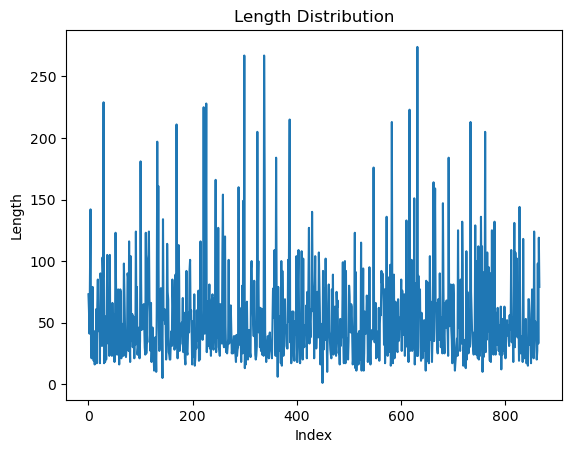

In [17]:
import matplotlib.pyplot as plt
df['length'].plot()
plt.xlabel('Index')
plt.ylabel('Length')
plt.title('Length Distribution')
plt.show()

#### Plotting horizontal box plot of the 'length' column

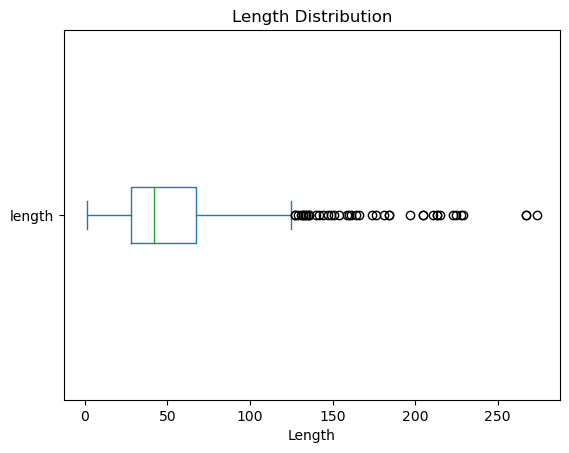

In [18]:
df['length'].plot(kind='box', vert=False)
plt.xlabel('Length')
plt.title('Length Distribution')
plt.show()

#### Plotting histogram of the 'length' column with 30 bins

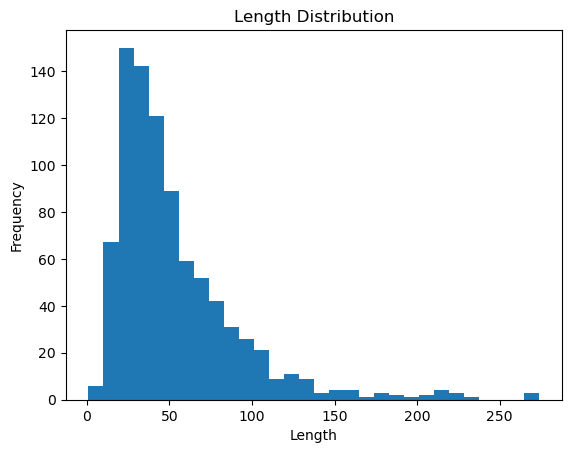

In [19]:
df['length'].plot(kind='hist', bins=30)
plt.xlabel('Length')
plt.title('Length Distribution')
plt.show()

### 3.Creating pipeline, removing stop words, word frequency analysis and wordclouds.

In [20]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [21]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

#### Building a text preprocessing pipeline using regular expressions

In [22]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [23]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [24]:
df['num_tokens'] = df['tokens'].map(len)
df.tail(10)

,text,length,tokens,num_tokens
856,"THIS IS NOT A SPORT, THIS IS ENTERTAINMENT.",44,"[sport, entertainment]",2
857,PARLE ADS MAKE ME WANT TO CLEAN MY EYES WITH H...,51,"[parle, ads, make, want, clean, eyes, harpic]",7
858,MI SUB CHANGED THEIR SUBREDDIT DP TO THIS,43,"[mi, sub, changed, subreddit, dp]",5
859,BCCI SELECTORS VS LORD JAY SHAH,31,"[bcci, selectors, vs, lord, jay, shah]",6
860,BOWLING ALLROUNDER ?,20,"[bowling, allrounder]",2
861,POINTS TABLE AFTER RR VS MI,27,"[points, table, rr, vs, mi]",5
862,"""ROHIT SHARMA IS NOT THE CAPTAIN THAT INDIA NE...",98,"[rohit, sharma, captain, india, needed, t20, w...",10
863,CAPTION THIS.. WRONG ANSWERS ONLY,33,"[caption, wrong, answers]",3
864,"MANVINDER BISLA, THE MAN WHO MADE KKR WIN AGAI...",119,"[manvinder, bisla, man, made, kkr, win, csk, f...",13
865,"BROS GOT TIRED OF LAST OVER AGONIES, FINISHED ...",79,"[bros, got, tired, last, agonies, finished, ma...",9


#### Calculates the frequency of each token in the 'tokens' column of the DataFrame df

In [25]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('ipl', 174), ('rcb', 74), ('match', 60), ('vs', 56), ('season', 46)]


In [26]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [27]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
ipl,174
rcb,74
match,60
vs,56
season,46
team,42
srh,41
t20,34
csk,33


[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Words'),
 Text(0.5, 1.0, 'Most Used Words in Thread INDIA')]

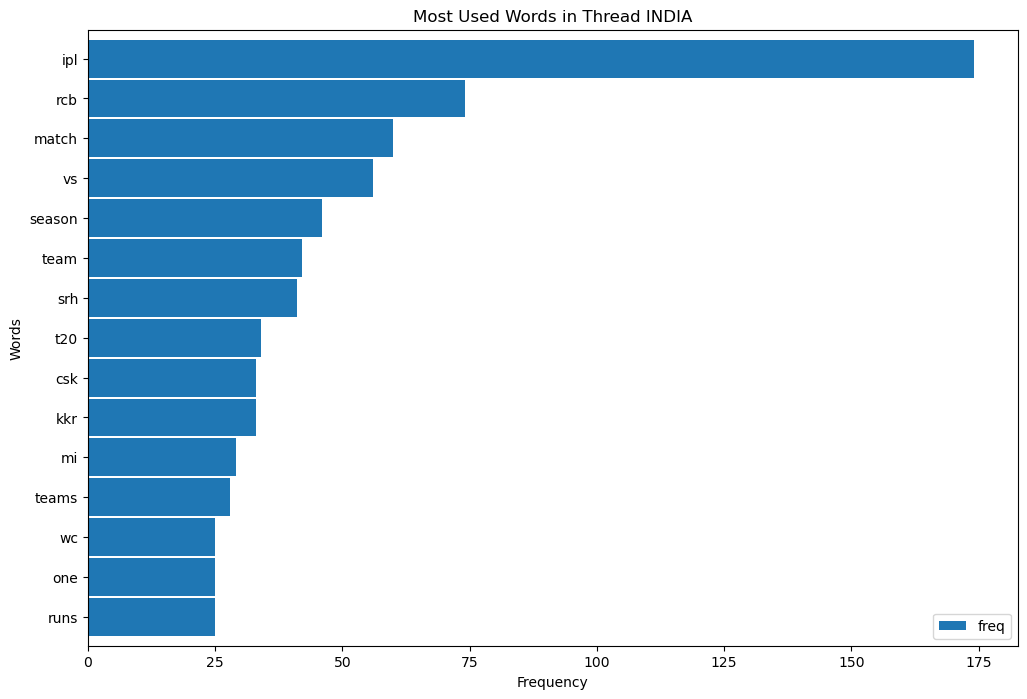

In [28]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Words', title='Most Used Words in Thread INDIA')

In [29]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


(-0.5, 399.5, 199.5, -0.5)

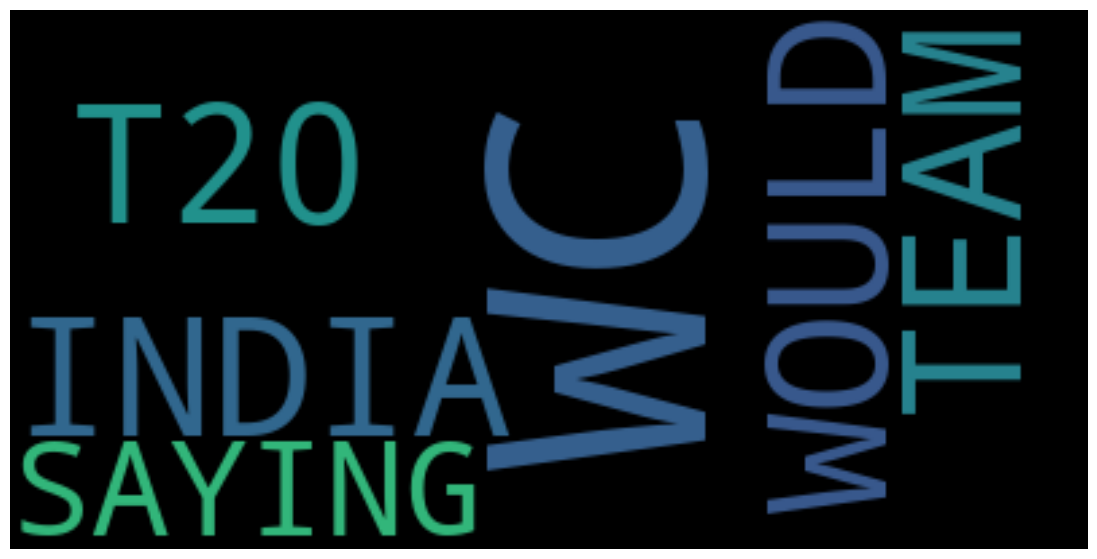

In [30]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = df['text'].values[500]
plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

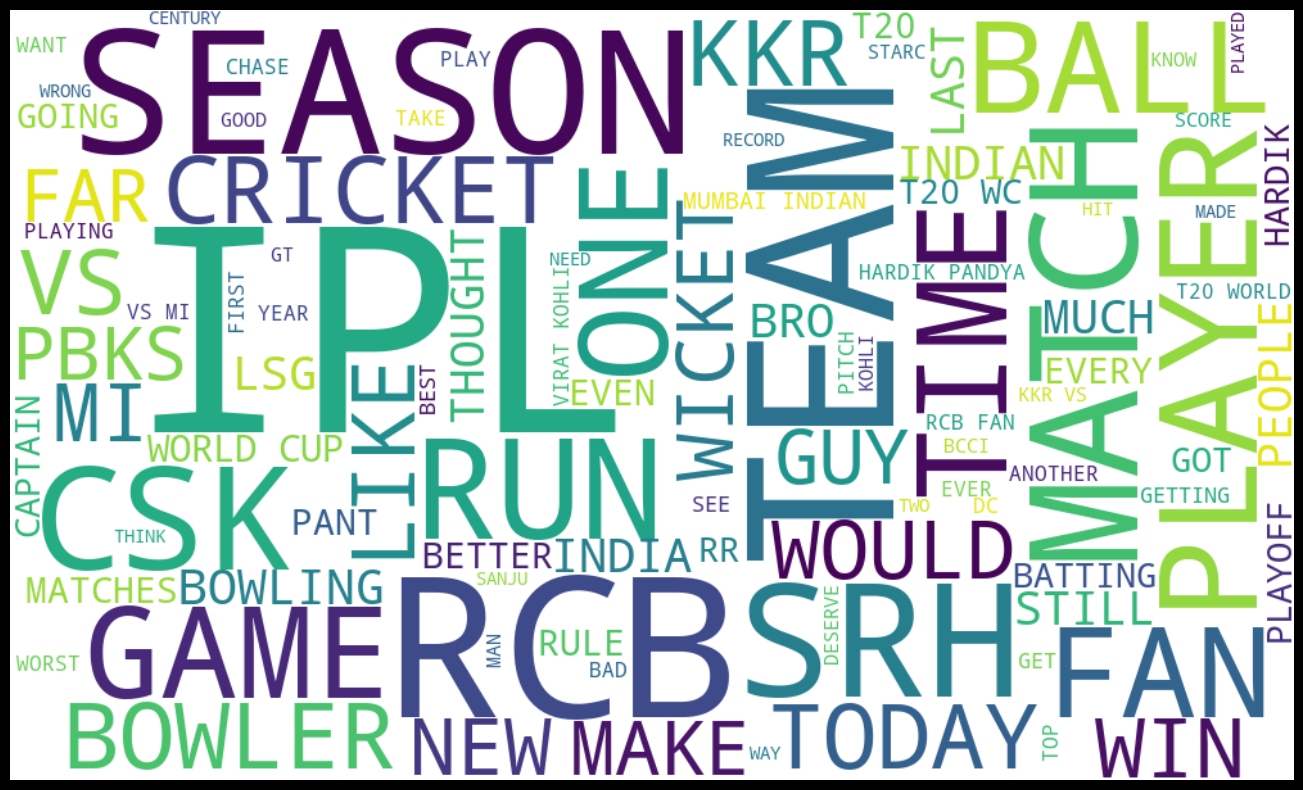

In [31]:
text = ' '.join( [twts for twts in df['text']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = stopwords,
                      background_color="white").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### 4.Five random strings regex 

##### This regex is designed to match dates formatted as "YYYY-MM-DD". It ensures that the year consists of exactly four digits, followed by a hyphen, two digits for the month, another hyphen, and two digits for the day. The anchors ^ and $ at the beginning and end of the pattern ensure that the entire string must conform to this pattern, preventing partial matches.

In [44]:
date_regex = r'^\d{4}-\d{2}-\d{2}$'

#### This pattern is used to validate IPv4 addresses, which are composed of four octets separated by dots. Each octet is a numeric string that can range from 0 to 255, but this regex does not include logic to limit values to 255 or less; it simply checks for one to three digits per octet. The pattern repeats the digit-dot group three times and concludes with a final set of one to three digits.

In [45]:
ipv4_regex = r'^(\d{1,3}\.){3}\d{1,3}$'


#### This regex matches a wide variety of URLs. It optionally starts with "http://" or "https://", followed optionally by "www.". It then captures a domain name, which can include alphanumeric characters and certain symbols like hyphens or underscores, for up to 256 characters. This is followed by a period and a domain extension (like .com, .org) that is between one and six alphanumeric characters long. The pattern can include additional path, query parameters, or fragment identifiers.

In [46]:
url_regex = r'^(https?:\/\/)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)$'

##### This regex matches typical U.S. license plate numbers, which can contain up to seven alphanumeric characters (letters and digits). The entire pattern must match the entire input string from start to end, ensuring that no additional characters are present outside of these criteria.

In [47]:
password_regex = r'^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[@$!%*?&])[A-Za-z\d@$!%*?&]{8,20}$'


##### This regex is designed to validate passwords based on specific security criteria. It checks that a password:

Contains at least one lowercase letter ((?=.*[a-z]))
Contains at least one uppercase letter ((?=.*[A-Z]))
Contains at least one digit ((?=.*\d))
Contains at least one special character from the set [@$!%*?&] ((?=.*[@$!%*?&]))
Has a length of between 8 and 20 characters ([A-Za-z\d@$!%*?&]{8,20})


In [50]:
license_plate_regex = r'^[A-Z0-9]{1,7}$'


In [51]:
test_cases = {
    "Date (YYYY-MM-DD)": ("2023-09-15", date_regex),
    "IPv4 Address": ("192.168.1.1", ipv4_regex),
    "URL": ("https://www.example.com", url_regex),
    "License Plate": ("ABC1234", license_plate_regex),
    "Strong Password": ("Example@123", password_regex)
}

def test_regex(description, string, pattern):
    print(f"{description}: {'Matches' if re.match(pattern, string) else 'Does not match'}")

for desc, (string, pattern) in test_cases.items():
    test_regex(desc, string, pattern)

Date (YYYY-MM-DD): Matches
IPv4 Address: Matches
URL: Matches
License Plate: Matches
Strong Password: Matches


### 5.Sentiment Analysis

### Installing textblob package

In [37]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [38]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#### These functions calculates the subjectivity & polarity of the input text

In [39]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

#Now display data
df.head()

,text,length,tokens,num_tokens,Subjectivity,Polarity
0,FEELS LIKE THIS MAN'S 175* WILL BE THE ONLY RE...,73,"[feels, like, man, record, unbeaten]",5,1.000000,0.000000
1,ONE OF THE GREATEST KNOCKS EVER IN AN IPL CHAS...,60,"[one, greatest, knocks, ever, ipl, chase, take...",8,1.000000,1.000000
2,WHICH TEAM HAS THE WORST FAN BASE IN IPL?,41,"[team, worst, fan, base, ipl]",5,1.000000,-0.900000
3,THERES SOMETHING SPECAL ABOUT GETTING A BIG CR...,87,"[theres, something, specal, getting, big, crow...",12,0.100000,0.000000
4,THOUGHTS ? I'M NOT TROLLING HIM BUT THIS STYLE...,142,"[thoughts, trolling, style, cricket, kinda, ol...",10,0.333333,0.033333


In [40]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(20)

,text,length,tokens,num_tokens,Subjectivity,Polarity,Insight
0,FEELS LIKE THIS MAN'S 175* WILL BE THE ONLY RE...,73,"[feels, like, man, record, unbeaten]",5,1.000000,0.000000,Neutral
1,ONE OF THE GREATEST KNOCKS EVER IN AN IPL CHAS...,60,"[one, greatest, knocks, ever, ipl, chase, take...",8,1.000000,1.000000,Positive
2,WHICH TEAM HAS THE WORST FAN BASE IN IPL?,41,"[team, worst, fan, base, ipl]",5,1.000000,-0.900000,Negative
3,THERES SOMETHING SPECAL ABOUT GETTING A BIG CR...,87,"[theres, something, specal, getting, big, crow...",12,0.100000,0.000000,Neutral
4,THOUGHTS ? I'M NOT TROLLING HIM BUT THIS STYLE...,142,"[thoughts, trolling, style, cricket, kinda, ol...",10,0.333333,0.033333,Positive
5,HARDIK PANDYA'S CONTRIBUTION,29,"[hardik, pandya, contribution]",3,0.000000,0.000000,Neutral
6,RISHABH PANT GT VS DC,21,"[rishabh, pant, gt, vs, dc]",5,0.000000,0.000000,Neutral
7,SOMEPEOPLE DOUBTED ME (INCLUDING ME),36,"[somepeople, doubted, including]",3,0.000000,0.000000,Neutral
8,LIVE SCORE MATCH THREAD MATCH 43 - DELHI CAPI...,79,"[live, score, match, thread, match, delhi, cap...",11,0.500000,0.136364,Positive
9,"DELHI VS MUMBAI, WHAT'S BETTER?",31,"[delhi, vs, mumbai, better]",4,0.500000,0.500000,Positive


In [41]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

####  Bar plot to visualize the sentiment scores of Cricket

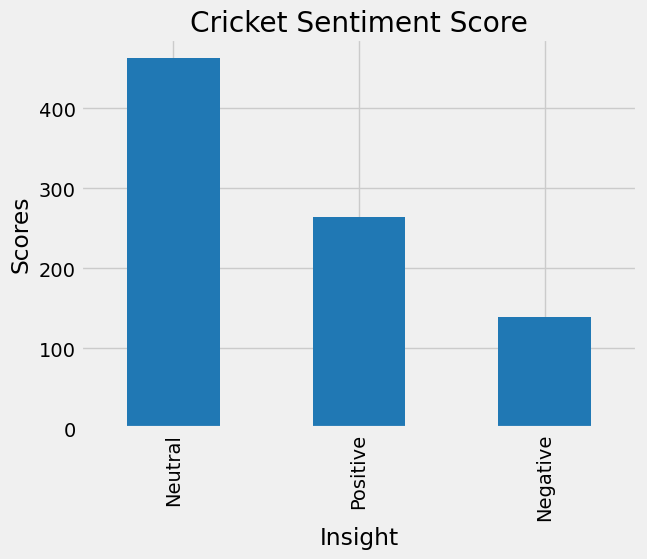

In [42]:
#Plot the values count of sentiment
plt.title("Cricket Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()